## Computer vision is the practice of writing the computer vision algorithms which can discover patterns in visual data.

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref=zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-08-31 12:52:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.207, 142.251.179.207, 64.233.180.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   137MB/s    in 0.8s    

2024-08-31 12:52:53 (137 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [6]:
!ls pizza_steak/test/pizza

1001116.jpg  1459760.jpg  2082495.jpg  254812.jpg   328965.jpg	 3785667.jpg  625434.jpg
1032754.jpg  1475479.jpg  2101820.jpg  2549661.jpg  3296507.jpg  3793004.jpg  645087.jpg
103708.jpg   1484836.jpg  2111981.jpg  2572488.jpg  3296907.jpg  380739.jpg   648055.jpg
1060407.jpg  148765.jpg   2124579.jpg  2582289.jpg  3316410.jpg  3814200.jpg  65128.jpg
106507.jpg   1503858.jpg  212995.jpg   2583389.jpg  331644.jpg	 3827990.jpg  666569.jpg
1067986.jpg  1506213.jpg  2157510.jpg  2605853.jpg  335474.jpg	 3898047.jpg  678708.jpg
1106738.jpg  1507019.jpg  2161321.jpg  2615100.jpg  3375083.jpg  3913440.jpg  714866.jpg
1119571.jpg  1512557.jpg  2165223.jpg  2619955.jpg  3376617.jpg  3919151.jpg  723745.jpg
11297.jpg    153195.jpg   2195935.jpg  2631321.jpg  3385460.jpg  395662.jpg   724290.jpg
1152100.jpg  1555015.jpg  2203687.jpg  2719697.jpg  3392194.jpg  397910.jpg   728260.jpg
1179703.jpg  1594097.jpg  2218680.jpg  2782998.jpg  341377.jpg	 398345.jpg   729262.jpg
1180001.jpg  1618659.jpg  

In [7]:
import os
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [9]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Aug 31 07:50 .
drwxr-xr-x 1 root root 4096 Aug 31 07:50 ..
drwxr-xr-x 4 root root 4096 Aug 31 07:50 test
drwxr-xr-x 4 root root 4096 Aug 31 07:50 train


In [11]:
#Another way to find out how many images are there in a file
num_steak_images=len(os.listdir("pizza_steak/train/steak"))
num_steak_images

750

In [89]:
#Get the list of classnames from subdirectory
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
# class_names=class_names[1:]
print(class_names)

['pizza' 'steak']


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)
  print(type(random_image))

  img=mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f"Image shape:{img.shape}")
  plt.axis('off')

  return img

['1981348.jpg']
<class 'list'>
Image shape:(512, 383, 3)


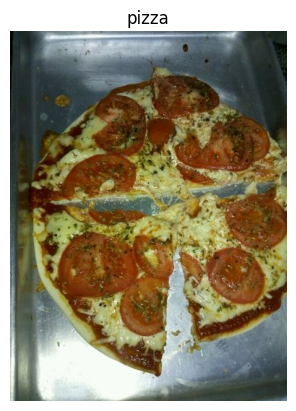

In [36]:
img=view_random_image('pizza_steak/train/','pizza')


In [37]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 383, 3), dtype=uint8, numpy=
array([[[  3,   8,   2],
        [  2,   7,   1],
        [  0,   6,   2],
        ...,
        [ 27,  40,  31],
        [ 29,  42,  33],
        [ 31,  42,  34]],

       [[  6,  11,   5],
        [  2,   7,   1],
        [  0,   5,   1],
        ...,
        [ 28,  41,  32],
        [ 29,  42,  33],
        [ 30,  41,  33]],

       [[ 12,  17,  11],
        [  7,  12,   6],
        [  1,   7,   3],
        ...,
        [ 29,  42,  33],
        [ 29,  42,  33],
        [ 29,  40,  32]],

       ...,

       [[181, 197, 186],
        [202, 218, 207],
        [217, 234, 224],
        ...,
        [102, 121, 135],
        [102, 122, 133],
        [104, 123, 137]],

       [[176, 192, 181],
        [199, 215, 204],
        [218, 235, 225],
        ...,
        [105, 127, 141],
        [108, 130, 143],
        [113, 135, 149]],

       [[170, 186, 175],
        [196, 212, 201],
        [218, 235, 225],
        ...,
        [107, 129, 14

In [44]:
img/255.

array([[[0.01176471, 0.03137255, 0.00784314],
        [0.00784314, 0.02745098, 0.00392157],
        [0.        , 0.02352941, 0.00784314],
        ...,
        [0.10588235, 0.15686275, 0.12156863],
        [0.11372549, 0.16470588, 0.12941176],
        [0.12156863, 0.16470588, 0.13333333]],

       [[0.02352941, 0.04313725, 0.01960784],
        [0.00784314, 0.02745098, 0.00392157],
        [0.        , 0.01960784, 0.00392157],
        ...,
        [0.10980392, 0.16078431, 0.1254902 ],
        [0.11372549, 0.16470588, 0.12941176],
        [0.11764706, 0.16078431, 0.12941176]],

       [[0.04705882, 0.06666667, 0.04313725],
        [0.02745098, 0.04705882, 0.02352941],
        [0.00392157, 0.02745098, 0.01176471],
        ...,
        [0.11372549, 0.16470588, 0.12941176],
        [0.11372549, 0.16470588, 0.12941176],
        [0.11372549, 0.15686275, 0.1254902 ]],

       ...,

       [[0.70980392, 0.77254902, 0.72941176],
        [0.79215686, 0.85490196, 0.81176471],
        [0.85098039, 0

In [49]:
type((img/255.)[0][0][0])

numpy.float64

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 12s 158ms/step - loss: 0.5548 - accuracy: 0.7167 - val_loss: 0.4212 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4172 - accuracy: 0.8200 - val_loss: 0.3228 - val_accuracy: 0.8760
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3927 - accuracy: 0.8227 - val_loss: 0.3712 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 7s 139ms/step - loss: 0.3742 - accuracy: 0.8460 - val_loss: 0.3489 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 6s 133ms/step - loss: 0.3284 - accuracy: 0.8707 - val_loss: 0.3769 - val_accuracy: 0.8400


In [12]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

## Let's replicate the model we built previously to see whether it works in image data [Tensorflow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.50462&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [7]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2=model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      validation_data=valid_data,validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 7s 127ms/step - loss: 0.8342 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 104ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 123ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 101ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 124ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [11]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_10 (Dense)            (None, 4)                 602116    
                                                                 
 dense_11 (Dense)            (None, 4)                 20        
                                                                 
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer='Adam',
                metrics=['accuracy'])

history_3=model_3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 109ms/step - loss: 4.2247 - accuracy: 0.6107 - val_loss: 0.8547 - val_accuracy: 0.7120
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 1.0247 - accuracy: 0.6633 - val_loss: 0.5573 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6084 - accuracy: 0.7500 - val_loss: 0.5050 - val_accuracy: 0.7420
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.6201 - accuracy: 0.7420 - val_loss: 0.4572 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 5s 106ms/step - loss: 0.4991 - accuracy: 0.7767 - val_loss: 0.4684 - val_accuracy: 0.7640


In [16]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 150528)            0         
                                                                 
 dense_21 (Dense)            (None, 100)               15052900  
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 100)               10100     
                                                                 
 dense_24 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
15073201/31101

484.6532587376612

## Binary Classification (Let's Break it Down)

['2268692.jpg']
<class 'list'>
Image shape:(512, 512, 3)
['1617418.jpg']
<class 'list'>
Image shape:(512, 512, 3)


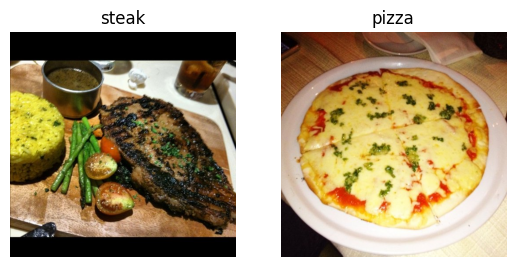

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)

steak_img=view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/",'pizza')

#**Reasons for using 32 as the batch size**


## 1. All 10000 images may not be able to fit into the memory at one go
## 2. Model will have difficulty in learning patterns of whole 10000 in one go.

In [4]:
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [6]:
#Load the image data from directory and convert it into batches

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode='binary',
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [32]:
images,labels=train_data.next()

In [36]:
len(images),len(labels)

(32, 32)

In [39]:
1500/32

46.875

In [44]:
labels

array([1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.],
      dtype=float32)

## A baseline is a simple model that you setup at the beginning and then you try to beat it after experimenting you try to beat the baseline

In [12]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [13]:
model_4=Sequential([
    Conv2D(filters=10, # it is the number of sliding windows the more it is the more complex model is
           kernel_size=(3,3), # it is the size of sliding window across an input
           input_shape=(224,224,3), # it is the size of input_shape
           padding='valid', # if valid then output shape is compressed else if padding is same then input shape == output shape
           activation='relu',
           strides=(1,1)), # the size of step the sliding window takes across an input
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [14]:


model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

In [15]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
len(train_data),len(test_data)

(47, 16)

In [16]:
history_4=model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 137ms/step - loss: 0.7388 - accuracy: 0.6640 - val_loss: 0.3833 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3878 - accuracy: 0.8400 - val_loss: 0.3422 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 6s 128ms/step - loss: 0.2722 - accuracy: 0.9013 - val_loss: 0.3314 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.1504 - accuracy: 0.9607 - val_loss: 0.3884 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 6s 128ms/step - loss: 0.0551 - accuracy: 0.9907 - val_loss: 0.3715 - val_accuracy: 0.8460


<Axes: >

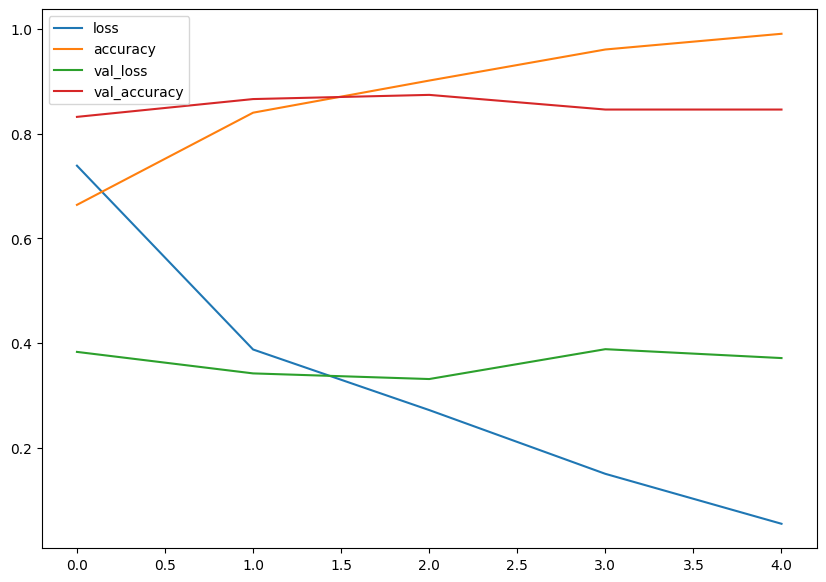

In [18]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [39]:
def plot_loss_curves(history):
  """
  Plot the loss curve for training and validation metrics"""

  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs=range(len(loss))
  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title("accuracy")
  plt.xlabel('epochs')
  plt.legend()

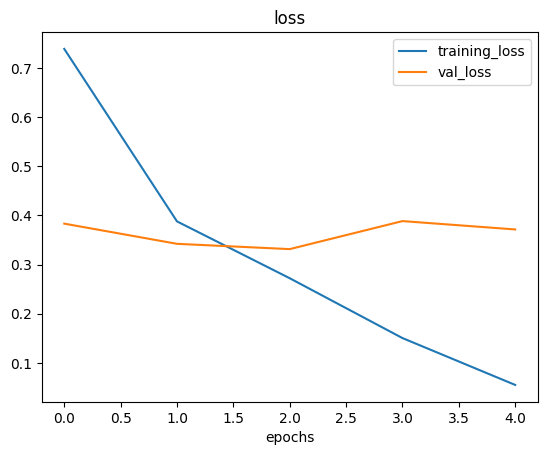

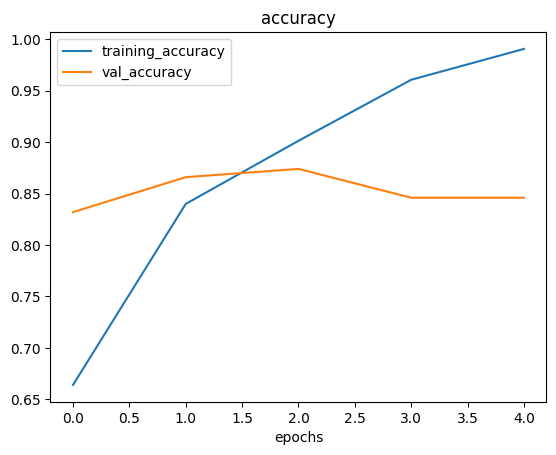

In [26]:
plot_loss_curves(history_4)

Fitting a machine learning model comes in three steps:

1. Create a baseline
2. Try and beat it by overfitiing
3. Reduce overfitting


Ways to induce overfitting:
1. Increase the number of layers
2. Increase the number of hidden units
3. Add another dense layer to the output of flattened layer

Reduce Overfitting:
1. Doing Regularization
2. Add more data
3. Data Augmentation



In [27]:
model_5=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [28]:
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])



In [29]:
history_5=model_5.fit(train_data,steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      epochs=5,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 130ms/step - loss: 0.6313 - accuracy: 0.6400 - val_loss: 0.4883 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 5s 110ms/step - loss: 0.4867 - accuracy: 0.7853 - val_loss: 0.4089 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4067 - accuracy: 0.8167 - val_loss: 0.3353 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 6s 126ms/step - loss: 0.4220 - accuracy: 0.8173 - val_loss: 0.3321 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3794 - accuracy: 0.8453 - val_loss: 0.3472 - val_accuracy: 0.8340


In [30]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

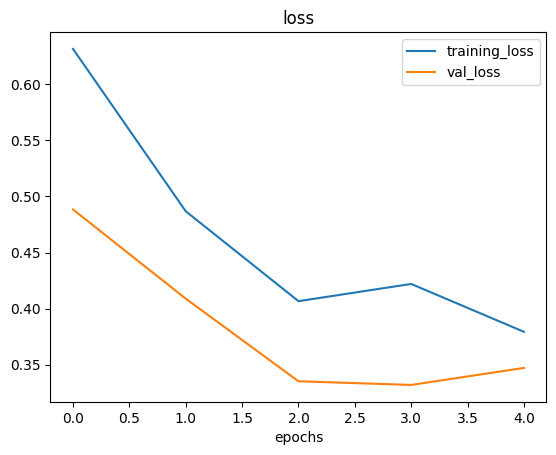

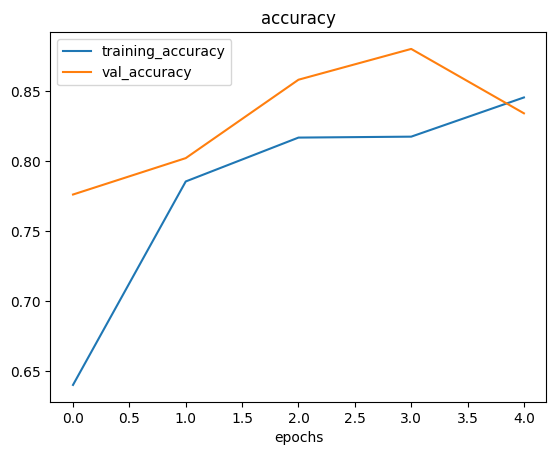

In [31]:
plot_loss_curves(history_5)

### Reducing overfitting is also known as regularization

In [8]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,#Scale the image to be between 0 and 1
                                           rotation_range=0.2, # Rotate the image by 0.2
                                           shear_range=0.2, # Do you want to shear the image
                                           zoom_range=0.2, # Do you want to zoom the image
                                           width_shift_range=0.2,  # Move your image on the x-axis
                                           height_shift_range=0.3, # Move your image on the y-axis
                                           horizontal_flip=True) # Do you want to flip an image?

train_datagen=ImageDataGenerator(rescale=1/255.)

test_datagen=ImageDataGenerator(rescale=1/255.)


In [11]:
print("Augmented_data")
train_data_augmented=train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                 class_mode='binary',
                                                                 shuffle=False,
                                                                 target_size=(224,224),
                                                                 batch_size=32)
print("Non Augmented training data")
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             class_mode='binary',
                                             shuffle=False,
                                             target_size=(224,224),
                                             batch_size=32)


print("Non Augmented testing data")
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           class_mode='binary',
                                           target_size=(224,224),
                                           batch_size=32)



Augmented_data
Found 1500 images belonging to 2 classes.
Non Augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented testing data
Found 500 images belonging to 2 classes.


In [16]:
images,labels=next(train_data)
augmented_images,labels=next(train_data_augmented)

In [22]:
augmented_images[14]==images[14]

array([[[0.28971606, 0.34461802, 0.34486544],
        [0.29620418, 0.35110614, 0.3513535 ],
        [0.3047176 , 0.35961956, 0.36196348],
        ...,
        [0.38478625, 0.47819513, 0.49411768],
        [0.38478616, 0.4781952 , 0.49411768],
        [0.38478604, 0.47819525, 0.49411768]],

       [[0.2924697 , 0.34737167, 0.34737167],
        [0.2992673 , 0.35416925, 0.35416925],
        [0.30429024, 0.3591922 , 0.36143366],
        ...,
        [0.39094958, 0.48506725, 0.5007535 ],
        [0.39094967, 0.48506734, 0.5007536 ],
        [0.3909498 , 0.48506746, 0.5007537 ]],

       [[0.294946  , 0.34984797, 0.34984797],
        [0.29988575, 0.3547877 , 0.3547877 ],
        [0.30420592, 0.3591079 , 0.361353  ],
        ...,
        [0.38920635, 0.483324  , 0.49901026],
        [0.38920632, 0.48332396, 0.49901024],
        [0.38920626, 0.4833239 , 0.49901018]],

       ...,

       [[0.59382355, 0.5551961 , 0.43196082],
        [0.58950335, 0.55420923, 0.4326406 ],
        [0.60044384, 0

In [21]:
images[14]

array([[[0.02352941, 0.01960784, 0.01176471],
        [0.01960784, 0.01568628, 0.00784314],
        [0.01960784, 0.01568628, 0.00784314],
        ...,
        [0.21960786, 0.22352943, 0.20000002],
        [0.21568629, 0.21960786, 0.20000002],
        [0.21176472, 0.21568629, 0.19607845]],

       [[0.02352941, 0.01960784, 0.01176471],
        [0.01960784, 0.01568628, 0.00784314],
        [0.01960784, 0.01568628, 0.00784314],
        ...,
        [0.21176472, 0.21568629, 0.19215688],
        [0.21176472, 0.21568629, 0.19607845],
        [0.21176472, 0.21568629, 0.19607845]],

       [[0.02352941, 0.01960784, 0.01176471],
        [0.01960784, 0.01568628, 0.00784314],
        [0.01960784, 0.01568628, 0.00784314],
        ...,
        [0.21176472, 0.21568629, 0.19215688],
        [0.20784315, 0.21176472, 0.19215688],
        [0.20784315, 0.21176472, 0.19215688]],

       ...,

       [[0.04705883, 0.02745098, 0.01568628],
        [0.05490196, 0.02352941, 0.01568628],
        [0.0627451 , 0

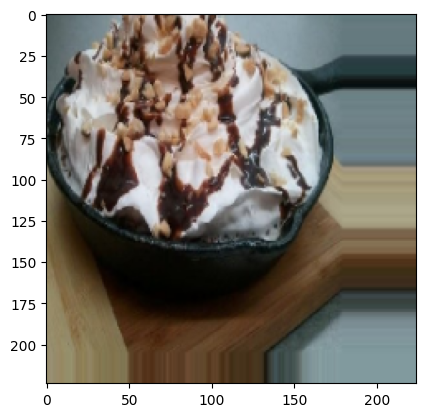

In [20]:
plt.imshow(augmented_images[14])

Showing original number: 14


(-0.5, 223.5, 223.5, -0.5)

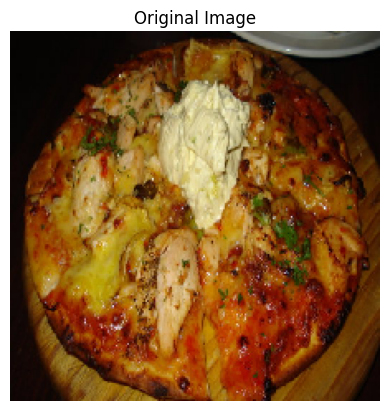

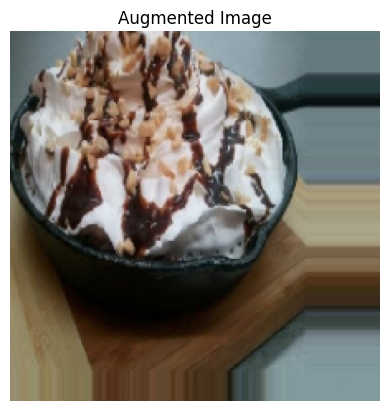

In [18]:
import random
random_number=random.randint(0,32)
print(f"Showing original number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D

model_6=Sequential([
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')

])

In [29]:
model_6.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_6=model_6.fit(train_data_augmented,epochs=1,steps_per_epoch=len(train_data),
            validation_data=test_data,validation_steps=len(test_data))

47/47 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.5385 - loss: 0.6921 - val_accuracy: 0.6680 - val_loss: 0.6754


In [30]:
model_6.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

In [33]:
train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                       shuffle=True,
                                                                       target_size=(224,224),
                                                                       batch_size=32,
                                                                       class_mode='binary')

train_data_shuffled=train_datagen.flow_from_directory(directory=train_dir,
                                                   shuffle=True,
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [37]:
model_7=Sequential([
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [38]:
history_7=model_7.fit(train_data_augmented_shuffled,epochs=1,steps_per_epoch=len(train_data),
            validation_data=test_data,validation_steps=len(test_data))

47/47 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.5171 - loss: 0.7011 - val_accuracy: 0.7880 - val_loss: 0.5836


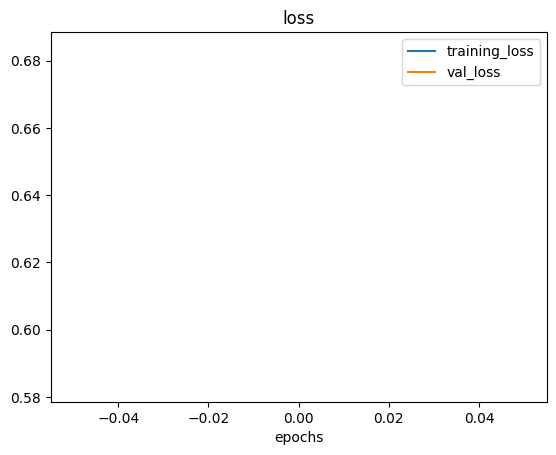

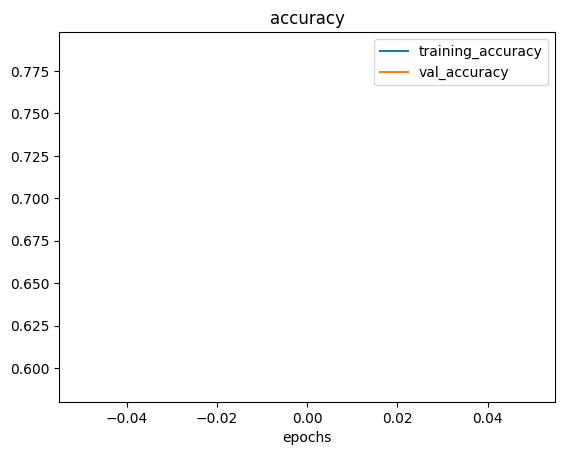

In [40]:
plot_loss_curves(history_7)

In [56]:
import matplotlib.image as mpimg

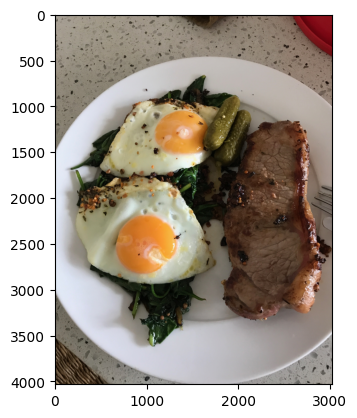

In [59]:
steak=mpimg.imread('03-steak.jpeg')
plt.imshow(steak)

In [60]:
steak.shape

(4032, 3024, 3)

In [61]:
tf.expand_dims(steak,axis=0).shape

TensorShape([1, 4032, 3024, 3])

In [63]:
model_7.predict(tf.expand_dims(steak,axis=0))

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 6760, but received input with shape (1, 1887520)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 4032, 3024, 3), dtype=uint8)
  • training=False
  • mask=None

In [68]:
def load_and_pred_image(filename,img_shape):

  #Reading the image
  img=tf.io.read_file(filename)
  #Decoding the image and converting it into tensors
  img=tf.image.decode_image(img)
  #Resizing the image to (224,224)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  #Here we are normalizing the image to have value between 0 and 1
  img=img/255.
  return img



In [70]:
steak=load_and_pred_image('03-steak.jpeg',224)

In [90]:
pred_class=class_names[round(model_7.predict(tf.expand_dims(steak,axis=0))[0][0])]
pred_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


'steak'

In [92]:
def pred_and_plot(model,filename,class_names=class_names):
  img=load_and_pred_image(filename,224)
  pred=model.predict(tf.expand_dims(img,axis=0))
  pred_class=class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


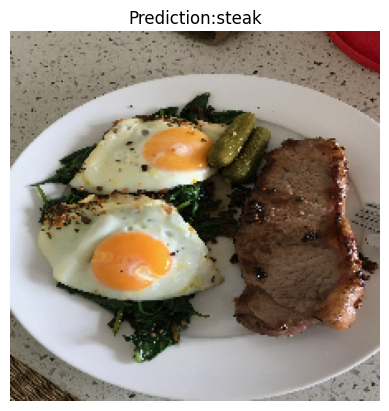

In [93]:
pred_and_plot(model_7,'03-steak.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


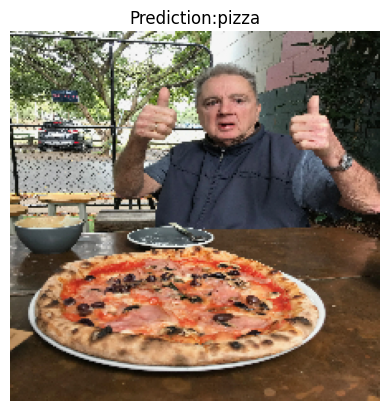

In [94]:
pred_and_plot(model_7,"03-pizza-dad.jpeg")